___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("weather.csv")

In [3]:
df.head()

STATION        DATE  AWND  TAVG  TMAX  TMIN  WT01  WT02  WT03  WT04  \
0  USC00379423  2005-01-01   NaN   NaN  47.0  28.0   NaN   NaN   NaN   NaN   
1  USC00379423  2005-01-02   NaN   NaN  52.0  24.0   NaN   NaN   NaN   NaN   
2  USC00379423  2005-01-03   NaN   NaN  48.0  27.0   NaN   NaN   NaN   NaN   
3  USC00379423  2005-01-04   NaN   NaN  54.0  40.0   NaN   NaN   NaN   NaN   
4  USC00379423  2005-01-05   NaN   NaN  44.0  31.0   NaN   NaN   NaN   NaN   

   ...  WT11  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  
0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 26 columns]

In [4]:
df[["TMIN","TMAX","TAVG"]].describe().T

count       mean        std   min   25%   50%   75%    max
TMIN  7996.0  42.099425  17.386667 -10.0  29.0  42.0  57.0   77.0
TMAX  8005.0  61.247096  18.495043  13.0  46.0  62.0  77.0  102.0
TAVG  1217.0  52.493016  17.829792   6.0  39.0  54.0  68.0   86.0

In [5]:
df[["TMIN","TMAX","TAVG"]]

TMIN  TMAX  TAVG
0     28.0  47.0   NaN
1     24.0  52.0   NaN
2     27.0  48.0   NaN
3     40.0  54.0   NaN
4     31.0  44.0   NaN
...    ...   ...   ...
8017  44.0  61.0  51.0
8018  30.0  44.0  40.0
8019  28.0  40.0  33.0
8020  27.0  35.0  30.0
8021  35.0  50.0  39.0

[8022 rows x 3 columns]

In [6]:
df[df["TAVG"].notnull()]["TAVG"]

4005    44.0
4006    36.0
4007    49.0
4008    42.0
4009    36.0
        ... 
8017    51.0
8018    40.0
8019    33.0
8020    30.0
8021    39.0
Name: TAVG, Length: 1217, dtype: float64

In [7]:
df["TAVG_mean"] = df["TAVG"].fillna((df["TMIN"]+df["TMAX"])/2)
df["TAVG_mean"]

0       37.5
1       38.0
2       37.5
3       47.0
4       37.5
        ... 
8017    51.0
8018    40.0
8019    33.0
8020    30.0
8021    39.0
Name: TAVG_mean, Length: 8022, dtype: float64

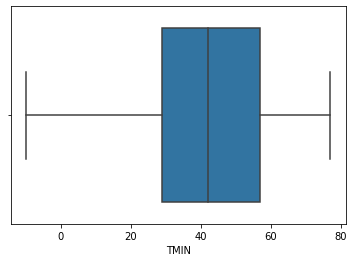

In [8]:
sns.boxplot(x = df.TMIN);

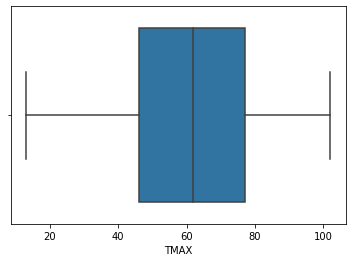

In [9]:
sns.boxplot(x = df["TMAX"]);

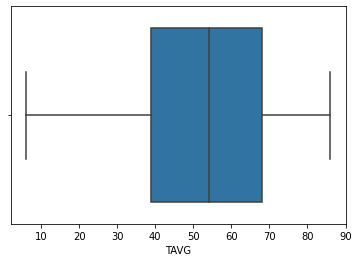

In [10]:
sns.boxplot(x = df[df["TAVG"].notnull()]["TAVG"]);

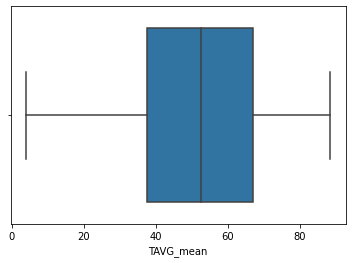

In [11]:
sns.boxplot(x = df["TAVG_mean"]);

***

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [12]:
df["TDIFF"] = df["TMAX"] - df["TMIN"]

In [13]:
df["TDIFF"].head()

0    19.0
1    28.0
2    21.0
3    14.0
4    13.0
Name: TDIFF, dtype: float64

In [14]:
df[["TDIFF"]].describe().T

count       mean       std   min   25%   50%   75%   max
TDIFF  7994.0  19.149237  7.009716 -25.0  14.0  19.0  24.0  48.0

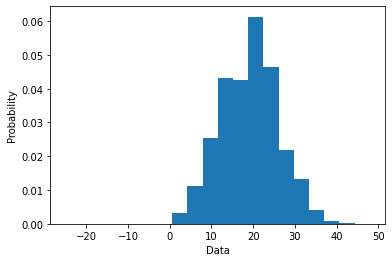

In [15]:
plt.hist(df[["TDIFF"]], density=True, bins=20)
plt.ylabel("Probability")
plt.xlabel("Data")
plt.show()

***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [16]:
WT = df.loc[0:,"WT01":"WT22"]
WT

WT01  WT02  WT03  WT04  WT05  WT06  WT07  WT08  WT09  WT10  WT11  WT13  \
0      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
8017   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8018   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8019   1.0   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   
8020   1.0   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   
8021   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

      WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  
0      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...    ...   ...   ...   ...   ...   ...   ...   ...  
8017   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
8018   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
8019   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
8020   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
8021   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[8022 rows x 20 columns]

In [17]:
WT["bad_conditions"] = WT.sum(axis=1)
WT["bad_conditions"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8017    1.0
8018    0.0
8019    3.0
8020    2.0
8021    1.0
Name: bad_conditions, Length: 8022, dtype: float64

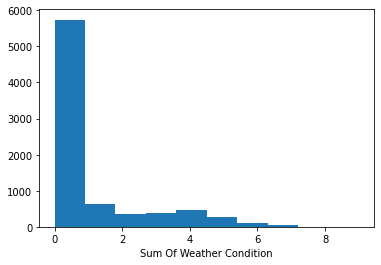

In [18]:
fig, ax = plt.subplots()
ax.hist(WT["bad_conditions"])
ax.set_xlabel("Sum Of Weather Condition");

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [19]:
WT["bad_conditions"].unique()

array([0., 1., 2., 3., 4., 9., 6., 8., 5., 7.])

In [ ]:
#def convert_str(x):
    #if x == 0:
        #return "good"
    #elif x >= 1 and x <=4:
        #return "bad"
    #else:
        #return "worse"

In [ ]:
#WT["rating"] = WT["bad_conditions"].map(lambda x : convert_str(x))
#WT["rating"]

In [20]:
mapping = {0 : "good", 1 : "bad", 2 : "bad", 3 : "bad", 4 : "bad", 5 : 'worse', 6 : 'worse', 7 : 'worse', 8 : 'worse', 9: 'worse'}

In [21]:
WT["rating"] = WT["bad_conditions"].map(mapping)
WT["rating"]

0       good
1       good
2       good
3       good
4       good
        ... 
8017     bad
8018    good
8019     bad
8020     bad
8021     bad
Name: rating, Length: 8022, dtype: object

In [22]:
WT["rating"].unique()

array(['good', 'bad', 'worse'], dtype=object)

***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [23]:
cats = pd.Categorical(WT["rating"], categories=["good", "bad", "worse"])
cats

['good', 'good', 'good', 'good', 'good', ..., 'bad', 'good', 'bad', 'bad', 'bad']
Length: 8022
Categories (3, object): ['good', 'bad', 'worse']

In [24]:
WT["rating"] = WT["rating"].astype('category')
WT["rating"]

0       good
1       good
2       good
3       good
4       good
        ... 
8017     bad
8018    good
8019     bad
8020     bad
8021     bad
Name: rating, Length: 8022, dtype: category
Categories (3, object): ['bad', 'good', 'worse']

In [25]:
df["rating"] = WT["rating"]
df

STATION        DATE   AWND  TAVG  TMAX  TMIN  WT01  WT02  WT03  \
0     USC00379423  2005-01-01    NaN   NaN  47.0  28.0   NaN   NaN   NaN   
1     USC00379423  2005-01-02    NaN   NaN  52.0  24.0   NaN   NaN   NaN   
2     USC00379423  2005-01-03    NaN   NaN  48.0  27.0   NaN   NaN   NaN   
3     USC00379423  2005-01-04    NaN   NaN  54.0  40.0   NaN   NaN   NaN   
4     USC00379423  2005-01-05    NaN   NaN  44.0  31.0   NaN   NaN   NaN   
...           ...         ...    ...   ...   ...   ...   ...   ...   ...   
8017  USW00014765  2015-12-27   9.17  51.0  61.0  44.0   1.0   NaN   NaN   
8018  USW00014765  2015-12-28  12.30  40.0  44.0  30.0   NaN   NaN   NaN   
8019  USW00014765  2015-12-29  12.53  33.0  40.0  28.0   1.0   NaN   NaN   
8020  USW00014765  2015-12-30   6.93  30.0  35.0  27.0   1.0   NaN   NaN   
8021  USW00014765  2015-12-31   8.05  39.0  50.0  35.0   1.0   NaN   NaN   

      WT04  ...  WT15  WT16  WT17  WT18  WT19  WT21  WT22  TAVG_mean  TDIFF  \
0      NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN       37.5   19.0   
1      NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN       38.0   28.0   
2      NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN       37.5   21.0   
3      NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN       47.0   14.0   
4      NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN       37.5   13.0   
...    ...  ...   ...   ...   ...   ...   ...   ...   ...        ...    ...   
8017   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN       51.0   17.0   
8018   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN       40.0   14.0   
8019   1.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN       33.0   12.0   
8020   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN       30.0    8.0   
8021   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN       39.0   15.0   

      rating  
0       good  
1       good  
2       good  
3       good  
4       good  
...      ...  
8017     bad  
8018    good  
8019     bad  
8020     bad  
8021     bad  

[8022 rows x 29 columns]

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [26]:
df1 = pd.read_csv("RI_cleaned.csv")

C:\Users\Ertuğrul\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [27]:
df1.head()

id state   stop_date stop_time location_raw  county_name  \
0  RI-2005-00001    RI  2005-01-02     01:55      Zone K1          NaN   
1  RI-2005-00002    RI  2005-01-02     20:30      Zone X4          NaN   
2  RI-2005-00003    RI  2005-01-04     11:30      Zone X1          NaN   
3  RI-2005-00004    RI  2005-01-04     12:55      Zone X4          NaN   
4  RI-2005-00005    RI  2005-01-06     01:30      Zone X4          NaN   

   county_fips  fine_grained_location police_department driver_gender  ...  \
0          NaN                    NaN               600             M  ...   
1          NaN                    NaN               500             M  ...   
2          NaN                    NaN                 0           NaN  ...   
3          NaN                    NaN               500             M  ...   
4          NaN                    NaN               500             M  ...   

   search_conducted  search_type_raw search_type contraband_found  \
0             False              NaN         NaN            False   
1             False              NaN         NaN            False   
2             False              NaN         NaN            False   
3             False              NaN         NaN            False   
4             False              NaN         NaN            False   

  stop_outcome is_arrested stop_duration out_of_state drugs_related_stop  \
0     Citation       False      0-15 Min        False              False   
1     Citation       False     16-30 Min        False              False   
2          NaN         NaN           NaN          NaN              False   
3     Citation       False      0-15 Min        False              False   
4     Citation       False      0-15 Min        False              False   

   district  
0   Zone K1  
1   Zone X4  
2   Zone X1  
3   Zone X4  
4   Zone X4  

[5 rows x 26 columns]

In [28]:
df1.reset_index()

index             id state   stop_date stop_time location_raw  \
0            0  RI-2005-00001    RI  2005-01-02     01:55      Zone K1   
1            1  RI-2005-00002    RI  2005-01-02     20:30      Zone X4   
2            2  RI-2005-00003    RI  2005-01-04     11:30      Zone X1   
3            3  RI-2005-00004    RI  2005-01-04     12:55      Zone X4   
4            4  RI-2005-00005    RI  2005-01-06     01:30      Zone X4   
...        ...            ...   ...         ...       ...          ...   
509676  509676       RI-NA-06    RI         NaN       NaN      Zone NA   
509677  509677       RI-NA-07    RI         NaN       NaN      Zone NA   
509678  509678       RI-NA-08    RI         NaN       NaN      Zone NA   
509679  509679       RI-NA-09    RI         NaN       NaN      Zone NA   
509680  509680       RI-NA-10    RI         NaN       NaN      Zone NA   

        county_name  county_fips  fine_grained_location police_department  \
0               NaN          NaN                    NaN               600   
1               NaN          NaN                    NaN               500   
2               NaN          NaN                    NaN                 0   
3               NaN          NaN                    NaN               500   
4               NaN          NaN                    NaN               500   
...             ...          ...                    ...               ...   
509676          NaN          NaN                    NaN               NaN   
509677          NaN          NaN                    NaN               NaN   
509678          NaN          NaN                    NaN               NaN   
509679          NaN          NaN                    NaN               NaN   
509680          NaN          NaN                    NaN               NaN   

        ... search_conducted  search_type_raw  search_type contraband_found  \
0       ...            False              NaN          NaN            False   
1       ...            False              NaN          NaN            False   
2       ...            False              NaN          NaN            False   
3       ...            False              NaN          NaN            False   
4       ...            False              NaN          NaN            False   
...     ...              ...              ...          ...              ...   
509676  ...              NaN              NaN          NaN            False   
509677  ...              NaN              NaN          NaN            False   
509678  ...              NaN              NaN          NaN            False   
509679  ...              NaN              NaN          NaN            False   
509680  ...              NaN              NaN          NaN            False   

       stop_outcome is_arrested stop_duration out_of_state drugs_related_stop  \
0          Citation       False      0-15 Min        False              False   
1          Citation       False     16-30 Min        False              False   
2               NaN         NaN           NaN          NaN              False   
3          Citation       False      0-15 Min        False              False   
4          Citation       False      0-15 Min        False              False   
...             ...         ...           ...          ...                ...   
509676          NaN         NaN           NaN          NaN              False   
509677          NaN         NaN           NaN          NaN              False   
509678          NaN         NaN           NaN          NaN              False   
509679          NaN         NaN           NaN          NaN              False   
509680          NaN         NaN           NaN          NaN              False   

       district  
0       Zone K1  
1       Zone X4  
2       Zone X1  
3       Zone X4  
4       Zone X4  
...         ...  
509676  Zone NA  
509677  Zone NA  
509678  Zone NA  
509679  Zone NA  
509680  Zone NA  

[509681 rows x 27 columns]

***

In [29]:
df.head()

STATION        DATE  AWND  TAVG  TMAX  TMIN  WT01  WT02  WT03  WT04  \
0  USC00379423  2005-01-01   NaN   NaN  47.0  28.0   NaN   NaN   NaN   NaN   
1  USC00379423  2005-01-02   NaN   NaN  52.0  24.0   NaN   NaN   NaN   NaN   
2  USC00379423  2005-01-03   NaN   NaN  48.0  27.0   NaN   NaN   NaN   NaN   
3  USC00379423  2005-01-04   NaN   NaN  54.0  40.0   NaN   NaN   NaN   NaN   
4  USC00379423  2005-01-05   NaN   NaN  44.0  31.0   NaN   NaN   NaN   NaN   

   ...  WT15  WT16  WT17  WT18  WT19  WT21  WT22  TAVG_mean  TDIFF  rating  
0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN       37.5   19.0    good  
1  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN       38.0   28.0    good  
2  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN       37.5   21.0    good  
3  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN       47.0   14.0    good  
4  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN       37.5   13.0    good  

[5 rows x 29 columns]

In [30]:
weather_rating = df[["DATE","rating"]]
weather_rating

DATE rating
0     2005-01-01   good
1     2005-01-02   good
2     2005-01-03   good
3     2005-01-04   good
4     2005-01-05   good
...          ...    ...
8017  2015-12-27    bad
8018  2015-12-28   good
8019  2015-12-29    bad
8020  2015-12-30    bad
8021  2015-12-31    bad

[8022 rows x 2 columns]

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [31]:
ri_weather = pd.merge(df1, weather_rating, how="left", left_on="stop_date", right_on="DATE")

In [32]:
ri_weather

id state   stop_date stop_time location_raw  county_name  \
0        RI-2005-00001    RI  2005-01-02     01:55      Zone K1          NaN   
1        RI-2005-00001    RI  2005-01-02     01:55      Zone K1          NaN   
2        RI-2005-00002    RI  2005-01-02     20:30      Zone X4          NaN   
3        RI-2005-00002    RI  2005-01-02     20:30      Zone X4          NaN   
4        RI-2005-00003    RI  2005-01-04     11:30      Zone X1          NaN   
...                ...   ...         ...       ...          ...          ...   
1018076       RI-NA-06    RI         NaN       NaN      Zone NA          NaN   
1018077       RI-NA-07    RI         NaN       NaN      Zone NA          NaN   
1018078       RI-NA-08    RI         NaN       NaN      Zone NA          NaN   
1018079       RI-NA-09    RI         NaN       NaN      Zone NA          NaN   
1018080       RI-NA-10    RI         NaN       NaN      Zone NA          NaN   

         county_fips  fine_grained_location police_department driver_gender  \
0                NaN                    NaN               600             M   
1                NaN                    NaN               600             M   
2                NaN                    NaN               500             M   
3                NaN                    NaN               500             M   
4                NaN                    NaN                 0           NaN   
...              ...                    ...               ...           ...   
1018076          NaN                    NaN               NaN           NaN   
1018077          NaN                    NaN               NaN           NaN   
1018078          NaN                    NaN               NaN           NaN   
1018079          NaN                    NaN               NaN           NaN   
1018080          NaN                    NaN               NaN           NaN   

         ...  search_type  contraband_found stop_outcome is_arrested  \
0        ...          NaN             False     Citation       False   
1        ...          NaN             False     Citation       False   
2        ...          NaN             False     Citation       False   
3        ...          NaN             False     Citation       False   
4        ...          NaN             False          NaN         NaN   
...      ...          ...               ...          ...         ...   
1018076  ...          NaN             False          NaN         NaN   
1018077  ...          NaN             False          NaN         NaN   
1018078  ...          NaN             False          NaN         NaN   
1018079  ...          NaN             False          NaN         NaN   
1018080  ...          NaN             False          NaN         NaN   

        stop_duration out_of_state drugs_related_stop district        DATE  \
0            0-15 Min        False              False  Zone K1  2005-01-02   
1            0-15 Min        False              False  Zone K1  2005-01-02   
2           16-30 Min        False              False  Zone X4  2005-01-02   
3           16-30 Min        False              False  Zone X4  2005-01-02   
4                 NaN          NaN              False  Zone X1  2005-01-04   
...               ...          ...                ...      ...         ...   
1018076           NaN          NaN              False  Zone NA         NaN   
1018077           NaN          NaN              False  Zone NA         NaN   
1018078           NaN          NaN              False  Zone NA         NaN   
1018079           NaN          NaN              False  Zone NA         NaN   
1018080           NaN          NaN              False  Zone NA         NaN   

         rating  
0          good  
1           bad  
2          good  
3           bad  
4          good  
...         ...  
1018076     NaN  
1018077     NaN  
1018078     NaN  
1018079     NaN  
1018080     NaN  

[1018081 rows x 28 columns]

In [33]:
ri_weather.set_index("stop_date")

id state stop_time location_raw  county_name  \
stop_date                                                             
2005-01-02  RI-2005-00001    RI     01:55      Zone K1          NaN   
2005-01-02  RI-2005-00001    RI     01:55      Zone K1          NaN   
2005-01-02  RI-2005-00002    RI     20:30      Zone X4          NaN   
2005-01-02  RI-2005-00002    RI     20:30      Zone X4          NaN   
2005-01-04  RI-2005-00003    RI     11:30      Zone X1          NaN   
...                   ...   ...       ...          ...          ...   
NaN              RI-NA-06    RI       NaN      Zone NA          NaN   
NaN              RI-NA-07    RI       NaN      Zone NA          NaN   
NaN              RI-NA-08    RI       NaN      Zone NA          NaN   
NaN              RI-NA-09    RI       NaN      Zone NA          NaN   
NaN              RI-NA-10    RI       NaN      Zone NA          NaN   

            county_fips  fine_grained_location police_department  \
stop_date                                                          
2005-01-02          NaN                    NaN               600   
2005-01-02          NaN                    NaN               600   
2005-01-02          NaN                    NaN               500   
2005-01-02          NaN                    NaN               500   
2005-01-04          NaN                    NaN                 0   
...                 ...                    ...               ...   
NaN                 NaN                    NaN               NaN   
NaN                 NaN                    NaN               NaN   
NaN                 NaN                    NaN               NaN   
NaN                 NaN                    NaN               NaN   
NaN                 NaN                    NaN               NaN   

           driver_gender  driver_age_raw  ...  search_type contraband_found  \
stop_date                                 ...                                 
2005-01-02             M          1985.0  ...          NaN            False   
2005-01-02             M          1985.0  ...          NaN            False   
2005-01-02             M          1987.0  ...          NaN            False   
2005-01-02             M          1987.0  ...          NaN            False   
2005-01-04           NaN             NaN  ...          NaN            False   
...                  ...             ...  ...          ...              ...   
NaN                  NaN             NaN  ...          NaN            False   
NaN                  NaN             NaN  ...          NaN            False   
NaN                  NaN             NaN  ...          NaN            False   
NaN                  NaN             NaN  ...          NaN            False   
NaN                  NaN             NaN  ...          NaN            False   

           stop_outcome is_arrested stop_duration out_of_state  \
stop_date                                                        
2005-01-02     Citation       False      0-15 Min        False   
2005-01-02     Citation       False      0-15 Min        False   
2005-01-02     Citation       False     16-30 Min        False   
2005-01-02     Citation       False     16-30 Min        False   
2005-01-04          NaN         NaN           NaN          NaN   
...                 ...         ...           ...          ...   
NaN                 NaN         NaN           NaN          NaN   
NaN                 NaN         NaN           NaN          NaN   
NaN                 NaN         NaN           NaN          NaN   
NaN                 NaN         NaN           NaN          NaN   
NaN                 NaN         NaN           NaN          NaN   

           drugs_related_stop district        DATE rating  
stop_date                                                  
2005-01-02              False  Zone K1  2005-01-02   good  
2005-01-02              False  Zone K1  2005-01-02    bad  
2005-01-02              False  Zone X4  2005-01-02   good  
2005-01-02              Fal

In [34]:
ri_weather["rating"].dropna()

0          good
1           bad
2          good
3           bad
4          good
           ... 
1018066     bad
1018067    good
1018068     bad
1018069    good
1018070     bad
Name: rating, Length: 1018071, dtype: category
Categories (3, object): ['bad', 'good', 'worse']

***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [35]:
arrested_num = len(ri_weather[ri_weather["is_arrested"] == True])
arrested_num

33187

In [36]:
not_arrested_num = len(ri_weather[ri_weather["is_arrested"] == False])
not_arrested_num

926814

In [37]:
arrested_rate = (arrested_num/not_arrested_num)*100
arrested_rate

3.580761619915107

In [38]:
arrested_data = ri_weather[ri_weather["is_arrested"] == True]
arrested_data

id state   stop_date stop_time location_raw  county_name  \
28       RI-2005-00015    RI  2005-02-20     17:15      Zone X1          NaN   
29       RI-2005-00015    RI  2005-02-20     17:15      Zone X1          NaN   
72       RI-2005-00037    RI  2005-06-18     16:30      Zone X4          NaN   
73       RI-2005-00037    RI  2005-06-18     16:30      Zone X4          NaN   
100      RI-2005-00051    RI  2005-07-18     13:00      Zone X4          NaN   
...                ...   ...         ...       ...          ...          ...   
1017754  RI-2015-46907    RI  2015-12-30     09:27      Zone X4          NaN   
1017807  RI-2015-46934    RI  2015-12-30     13:15      Zone X3          NaN   
1017808  RI-2015-46934    RI  2015-12-30     13:15      Zone X3          NaN   
1018051  RI-2015-47056    RI  2015-12-31     22:10      Zone X4          NaN   
1018052  RI-2015-47056    RI  2015-12-31     22:10      Zone X4          NaN   

         county_fips  fine_grained_location police_department driver_gender  \
28               NaN                    NaN                 0             M   
29               NaN                    NaN                 0             M   
72               NaN                    NaN               500             F   
73               NaN                    NaN               500             F   
100              NaN                    NaN               500             M   
...              ...                    ...               ...           ...   
1017754          NaN                    NaN             900.0             F   
1017807          NaN                    NaN             200.0             M   
1017808          NaN                    NaN             200.0             M   
1018051          NaN                    NaN             300.0             F   
1018052          NaN                    NaN             300.0             F   

         ...         search_type  contraband_found      stop_outcome  \
28       ...                 NaN             False     Arrest Driver   
29       ...                 NaN             False     Arrest Driver   
72       ...                 NaN             False     Arrest Driver   
73       ...                 NaN             False     Arrest Driver   
100      ...                 NaN             False     Arrest Driver   
...      ...                 ...               ...               ...   
1017754  ...                 NaN             False  Arrest Passenger   
1017807  ...  Incident to Arrest             False  Arrest Passenger   
1017808  ...  Incident to Arrest             False  Arrest Passenger   
1018051  ...                 NaN             False     Arrest Driver   
1018052  ...                 NaN             False     Arrest Driver   

        is_arrested stop_duration out_of_state drugs_related_stop district  \
28             True     16-30 Min         True              False  Zone X1   
29             True     16-30 Min         True              False  Zone X1   
72             True       30+ Min        False              False  Zone X4   
73             True       30+ Min        False              False  Zone X4   
100            True       30+ Min        False              False  Zone X4   
...             ...           ...          ...                ...      ...   
1017754        True      0-15 Min        False              False  Zone X4   
1017807        True     16-30 Min         True              False  Zone X3   
1017808        True     16-30 Min         True              False  Zone X3   
1018051        True      0-15 Min        False              False  Zone X4   
1018052        True      0-15 Min        False              False  Zone X4   

               DATE  rating  
28       2005-02-20    good  
29       2005-02-20     bad  
72       2005-06-18    good  
73       2005-06-18     bad  
100      2005-07-18    good  
...             ...     ...  
1017754  2015-12-30     bad  
1017807  2015-12-30    good  
1017808  2015-12-30     bad  
1018051 

In [39]:
arrested_data.groupby("rating")["rating"].count()

rating
bad       7694
good     23841
worse     1652
Name: rating, dtype: int64

In [40]:
len(arrested_data)

33187

In [41]:
len(arrested_data[arrested_data["rating"] == "good"])

23841

In [42]:
bad_weather_arrested_rate = (len(arrested_data[arrested_data["rating"] == "bad"])/len(arrested_data))*100
bad_weather_arrested_rate

23.183776780064484

In [43]:
good_weather_arrested_rate = (len(arrested_data[arrested_data["rating"] == "good"])/len(arrested_data))*100
good_weather_arrested_rate

71.83837044625908

In [44]:
worse_weather_arrested_rate = (len(arrested_data[arrested_data["rating"] == "worse"])/len(arrested_data))*100
worse_weather_arrested_rate

4.97785277367644

In [45]:
arrested_data[arrested_data["rating"] == "good"].groupby("violation")["rating"].count()

violation
Equipment              5314
Moving violation       7408
Other                  2756
Registration/plates    2407
Seat belt               697
Speeding               5259
Name: rating, dtype: int64

In [46]:
arrested_data[arrested_data["rating"] == "bad"].groupby("violation")["rating"].count()

violation
Equipment              1708
Moving violation       2431
Other                   915
Registration/plates     835
Seat belt               177
Speeding               1628
Name: rating, dtype: int64

In [47]:
arrested_data[arrested_data["rating"] == "worse"].groupby("violation")["rating"].count()

violation
Equipment              369
Moving violation       496
Other                  203
Registration/plates    171
Speeding               413
Name: rating, dtype: int64

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.